<a href="https://colab.research.google.com/github/leokan92/class/blob/main/Aula2_redes_convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 2 - Redes Neurais Convolucionais: Exemplo simples

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

Vetores de entrada:
a = [0 1 2 3 4]
b = [5 6 7 8 9]

Vetor b invertido: [9 8 7 6 5]

Vetores expandidos (com padding):
a_expanded = [0 0 0 0 0 1 2 3 4 0 0 0 0]

Passo 1:
Multiplicando [0 0 0 0 0] * [9 8 7 6 5]
Resultado parcial: 0.0

Passo 2:
Multiplicando [0 0 0 0 1] * [9 8 7 6 5]
Resultado parcial: 5.0

Passo 3:
Multiplicando [0 0 0 1 2] * [9 8 7 6 5]
Resultado parcial: 16.0

Passo 4:
Multiplicando [0 0 1 2 3] * [9 8 7 6 5]
Resultado parcial: 34.0

Passo 5:
Multiplicando [0 1 2 3 4] * [9 8 7 6 5]
Resultado parcial: 60.0

Passo 6:
Multiplicando [1 2 3 4 0] * [9 8 7 6 5]
Resultado parcial: 70.0

Passo 7:
Multiplicando [2 3 4 0 0] * [9 8 7 6 5]
Resultado parcial: 70.0

Passo 8:
Multiplicando [3 4 0 0 0] * [9 8 7 6 5]
Resultado parcial: 59.0

Passo 9:
Multiplicando [4 0 0 0 0] * [9 8 7 6 5]
Resultado parcial: 36.0

Resultado final da convolução: [ 0.  5. 16. 34. 60. 70. 70. 59. 36.]



<ipython-input-3-bffa93216469>:42: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(manual_conv_result, use_line_collection=True)


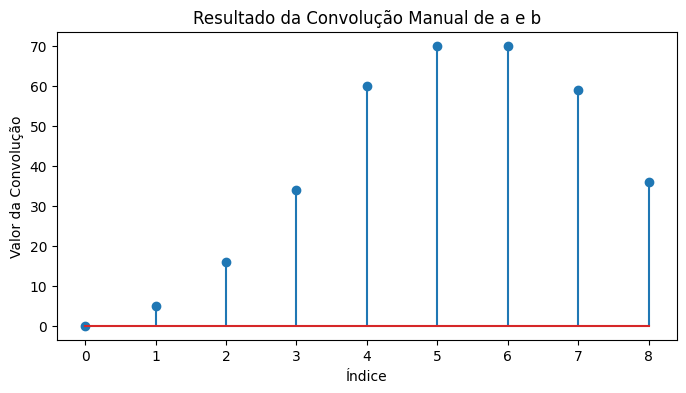

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Função que realiza a convolução manualmente e imprime cada passo
def manual_convolution(a, b):
    print("Vetores de entrada:")
    print(f"a = {a}")
    print(f"b = {b}\n")

    # Invertendo o vetor b
    b_flipped = b[::-1]
    print(f"Vetor b invertido: {b_flipped}\n")

    # Calculando a convolução manualmente
    conv_length = len(a) + len(b) - 1
    conv_result = np.zeros(conv_length)

    # Expandir os vetores a e b
    a_expanded = np.pad(a, (len(b) - 1, len(b) - 1), mode='constant')

    print(f"Vetores expandidos (com padding):")
    print(f"a_expanded = {a_expanded}\n")

    # Processo de convolução
    for i in range(conv_length):
        segment = a_expanded[i:i+len(b)]
        print(f"Passo {i+1}:")
        print(f"Multiplicando {segment} * {b_flipped}")
        conv_result[i] = np.sum(segment * b_flipped)
        print(f"Resultado parcial: {conv_result[i]}\n")

    print(f"Resultado final da convolução: {conv_result}\n")
    return conv_result

# Exemplo de convolução de dois vetores
a = np.array([0, 1, 2, 3, 4])
b = np.array([5, 6, 7, 8, 9])
manual_conv_result = manual_convolution(a, b)

# Plotando o resultado da convolução de vetores
plt.figure(figsize=(8, 4))
plt.stem(manual_conv_result, use_line_collection=True)
plt.title('Resultado da Convolução Manual de a e b')
plt.xlabel('Índice')
plt.ylabel('Valor da Convolução')
plt.show()

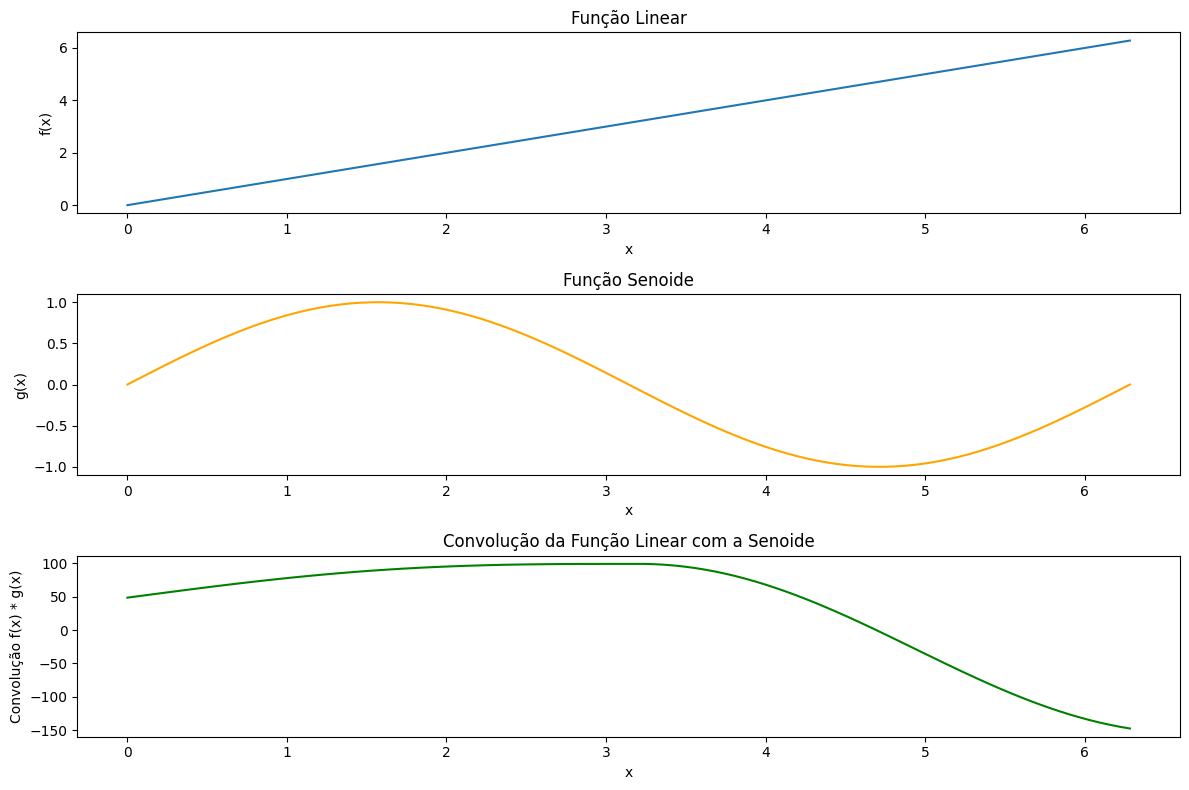

In [2]:
# Convolução de uma função linear com uma função senoide
def linear_function(x):
    return x

def sine_function(x):
    return np.sin(x)

# Definindo um intervalo de valores para a função
x = np.linspace(0, 2 * np.pi, 100)

# Gerando as funções
linear_values = linear_function(x)
sine_values = sine_function(x)

# Calculando a convolução
conv_functions = np.convolve(linear_values, sine_values, mode='same')

# Plotando as funções e o resultado da convolução
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x, linear_values, label='Função Linear')
plt.title('Função Linear')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(3, 1, 2)
plt.plot(x, sine_values, label='Função Senoide', color='orange')
plt.title('Função Senoide')
plt.xlabel('x')
plt.ylabel('g(x)')

plt.subplot(3, 1, 3)
plt.plot(x, conv_functions, label='Convolução', color='green')
plt.title('Convolução da Função Linear com a Senoide')
plt.xlabel('x')
plt.ylabel('Convolução f(x) * g(x)')

plt.tight_layout()
plt.show()

##Comparação dos kernels antes e depois do treinamento

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple CNN with one convolutional layer
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Single convolutional layer with 1 input channel, 1 output channel (filter), and 3x3 kernel
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0)

    def forward(self, x):
        # Forward pass through the convolutional layer
        x = self.conv1(x)
        return x

# Create an instance of the CNN
net = SimpleCNN()

# Define a loss function and optimizer
criterion = nn.MSELoss()  # Mean squared error loss
optimizer = optim.SGD(net.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Example input: A simple 5x5 grayscale image (1 channel, height = 5, width = 5)
input_image = torch.tensor([[[[1.0, 2.0, 3.0, 4.0, 5.0],
                              [6.0, 7.0, 8.0, 9.0, 10.0],
                              [11.0, 12.0, 13.0, 14.0, 15.0],
                              [16.0, 17.0, 18.0, 19.0, 20.0],
                              [21.0, 22.0, 23.0, 24.0, 25.0]]]], requires_grad=True)  # Shape: (1, 1, 5, 5)

# Target output: A simple target (we expect the network to produce this)
target = torch.tensor([[[[1.0, 2.0, 1.0],
                         [2.0, 3.0, 2.0],
                         [1.0, 2.0, 1.0]]]])

# Step 1: Forward pass (compute predictions)
output = net(input_image)
print("Output before training:\n", output)

# Compute loss (difference between the network output and target)
loss = criterion(output, target)
print("\nLoss before backpropagation: ", loss.item())

# Step 2: Perform backpropagation to compute gradients
optimizer.zero_grad()  # Clear previous gradients
loss.backward()  # Backpropagate to calculate gradients

# Step 3: Print the convolutional kernel (filter) and its gradient
print("\nKernel (weights) before update:\n", net.conv1.weight.data)
print("\nGradient of the kernel (weights) after backpropagation:\n", net.conv1.weight.grad)

# Step 4: Update the weights (kernel) using the optimizer
optimizer.step()

# Step 5: Print the updated kernel after the optimization step
print("\nKernel (weights) after update:\n", net.conv1.weight.data)


Output before training:
 tensor([[[[ 5.9170,  6.8882,  7.8594],
          [10.7731, 11.7443, 12.7155],
          [15.6292, 16.6004, 17.5716]]]], grad_fn=<ConvolutionBackward0>)

Loss before backpropagation:  118.35330963134766

Kernel (weights) before update:
 tensor([[[[-0.0515,  0.3017,  0.1029],
          [ 0.3188,  0.2664, -0.1303],
          [-0.3080,  0.3170,  0.1542]]]])

Gradient of the kernel (weights) after backpropagation:
 tensor([[[[174.7560, 194.9113, 215.0666],
          [275.5324, 295.6877, 315.8429],
          [376.3087, 396.4640, 416.6193]]]])

Kernel (weights) after update:
 tensor([[[[-1.7991, -1.6474, -2.0478],
          [-2.4366, -2.6904, -3.2887],
          [-4.0711, -3.6476, -4.0120]]]])


##Implementação completa de uma CNN

Aqui implementamos e testamos contra um MLP para mostrar a vantagem deste tipo de rede em relação a uma mais simples.

## Configurações

In [ ]:
# Configuração
BATCH_SIZE = 64
EPOCHS = 10
LR = 0.001

# Implementação da CNN

## Carregando Dataset MNIST

In [ ]:
# Carregar o MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 60970035.73it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 45166179.65it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27173892.05it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12880682.06it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Arquitetura CNN

In [ ]:
# Definir a CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(2)(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return nn.LogSoftmax(dim=1)(x)

## Arquitetura totalmente conectada MLP



In [ ]:
# Definir o MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        return nn.LogSoftmax(dim=1)(self.fc3(x))

In [ ]:
# Função de treino
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

# Função de teste
def test(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 1 - correct / total  # Erro

In [ ]:
# Treinando e Testando a CNN
cnn = CNN()
cnn_optimizer = optim.Adam(cnn.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss()
cnn_train_loss = []
cnn_test_error = []
for epoch in range(EPOCHS):
    train_loss = train(cnn, train_loader, cnn_optimizer, criterion)
    test_error = test(cnn, test_loader, criterion)
    cnn_train_loss.append(train_loss)
    cnn_test_error.append(test_error)
    print(f"CNN - Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Test Error: {test_error:.4f}")

# Treinando e Testando o MLP
mlp = MLP()
mlp_optimizer = optim.Adam(mlp.parameters(), lr=LR)
mlp_train_loss = []
mlp_test_error = []
for epoch in range(EPOCHS):
    train_loss = train(mlp, train_loader, mlp_optimizer, criterion)
    test_error = test(mlp, test_loader, criterion)
    mlp_train_loss.append(train_loss)
    mlp_test_error.append(test_error)
    print(f"MLP - Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Test Error: {test_error:.4f}")

# Comparando os resultados
print("\nComparação:")
print("CNN - Média Train Loss:", sum(cnn_train_loss)/EPOCHS, "Média Test Error:", sum(cnn_test_error)/EPOCHS)
print("MLP - Média Train Loss:", sum(mlp_train_loss)/EPOCHS, "Média Test Error:", sum(mlp_test_error)/EPOCHS)

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1345: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


CNN - Epoch 1/10, Train Loss: 0.2144, Test Error: 0.0153
CNN - Epoch 2/10, Train Loss: 0.0920, Test Error: 0.0125
CNN - Epoch 3/10, Train Loss: 0.0700, Test Error: 0.0118
CNN - Epoch 4/10, Train Loss: 0.0592, Test Error: 0.0106
CNN - Epoch 5/10, Train Loss: 0.0510, Test Error: 0.0095
CNN - Epoch 6/10, Train Loss: 0.0425, Test Error: 0.0089
CNN - Epoch 7/10, Train Loss: 0.0369, Test Error: 0.0086
CNN - Epoch 8/10, Train Loss: 0.0356, Test Error: 0.0083
CNN - Epoch 9/10, Train Loss: 0.0309, Test Error: 0.0082
CNN - Epoch 10/10, Train Loss: 0.0291, Test Error: 0.0080
MLP - Epoch 1/10, Train Loss: 0.3005, Test Error: 0.0490
MLP - Epoch 2/10, Train Loss: 0.1399, Test Error: 0.0376
MLP - Epoch 3/10, Train Loss: 0.0998, Test Error: 0.0319
MLP - Epoch 4/10, Train Loss: 0.0814, Test Error: 0.0290
MLP - Epoch 5/10, Train Loss: 0.0653, Test Error: 0.0283
MLP - Epoch 6/10, Train Loss: 0.0610, Test Error: 0.0244
MLP - Epoch 7/10, Train Loss: 0.0518, Test Error: 0.0254
MLP - Epoch 8/10, Train Loss: 

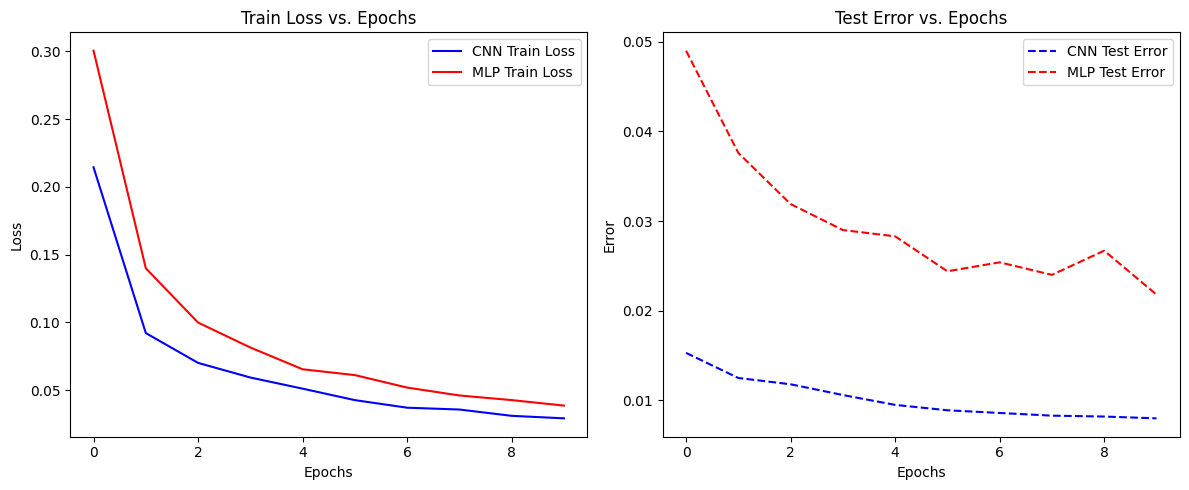

In [ ]:
import matplotlib.pyplot as plt

# Plotando as curvas de treino
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, subplot 1
plt.plot(cnn_train_loss, label='CNN Train Loss', color='blue')
plt.plot(mlp_train_loss, label='MLP Train Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Epochs')
plt.legend()

# Plotando as curvas de teste
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, subplot 2
plt.plot(cnn_test_error, label='CNN Test Error', color='blue', linestyle='dashed')
plt.plot(mlp_test_error, label='MLP Test Error', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Test Error vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()
